# CHAPTER 4 - LOGISTIC REGRESSION

## Create a dummy dataset

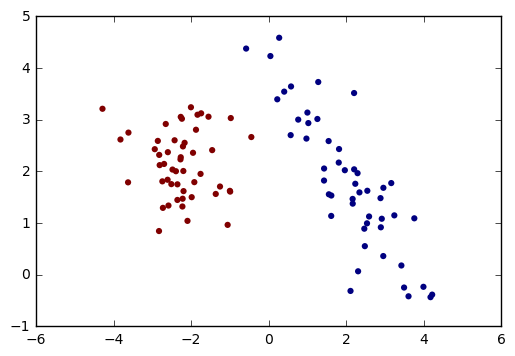

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

In [6]:
y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]

## Measuring the classifier's performance

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig, y_pred)

array([[4, 2],
       [1, 3]])

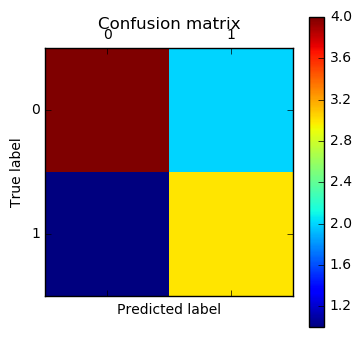

In [8]:
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.69999999999999996

In [6]:
from sklearn.metrics import precision_score
precision_score(y_orig, y_pred)

0.59999999999999998

In [7]:
from sklearn.metrics import recall_score
recall_score(y_orig, y_pred)

0.75

In [8]:
from sklearn.metrics import f1_score
f1_score(y_orig, y_pred)

0.66666666666666652

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.67      0.73         6
          1       0.60      0.75      0.67         4

avg / total       0.72      0.70      0.70        10



In [21]:
#from sklearn.metrics import r2_score
#r2_score(y_orig,y_pred)

-0.25

## Fitting the classifier

In [17]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), 
                                   test_size=0.33, random_state=101)


In [18]:
y_test.dtype

dtype('float64')

In [19]:
y_test

array([ 0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.])

In [20]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([ 0.06688448,  1.01981921,  1.08597427, -0.15225094,  1.05856628,
        0.8156161 ,  0.04837505,  0.7997539 ,  0.18942251, -0.03658995,
       -0.0462575 , -0.09640911,  1.0253004 , -0.17062754,  1.13642842,
        0.14052848, -0.00703683,  0.90903158,  1.26997191,  0.03606483,
       -0.19047191,  0.22476337, -0.05936491, -0.18559975,  0.28378888,
        0.01139188, -0.03559395,  0.22742328,  0.07485246,  1.24545626,
        0.13924533,  1.09388935,  0.35341582])

## The sigmoid (logit) function

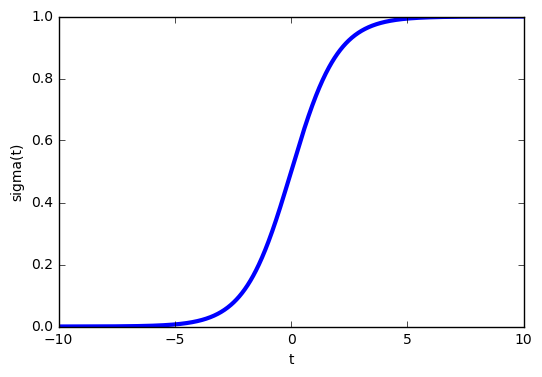

In [14]:
import numpy as np

def model(x):
    return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()

## Classification and decision boundaries

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

             precision    recall  f1-score   support

        0.0       1.00      0.95      0.98        22
        1.0       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        33



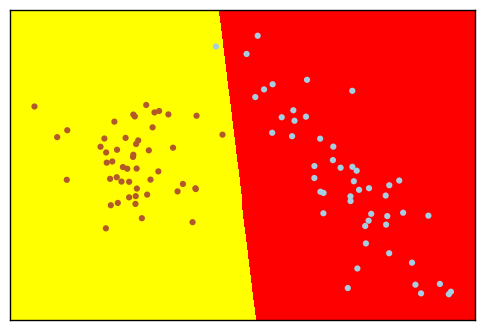

In [16]:
# Example based on:
# Code source: Gaël Varoquaux, Modified for documentation by Jaques Grobler, License: BSD 3 clause

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidth=0, cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

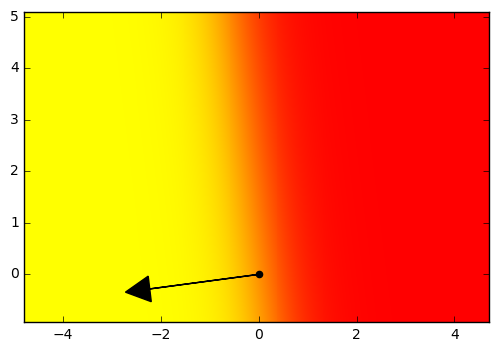

In [17]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

ax = plt.axes()
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.scatter(0, 0, marker='o', c='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [18]:
clf.coef_

array([[-2.22576095, -0.28230719]])

In [19]:
%timeit clf.fit(X, y)

1000 loops, best of 3: 577 µs per loop


In [20]:
%timeit clf.predict(X)

10000 loops, best of 3: 48.5 µs per loop


In [21]:
%timeit clf.predict_proba(X)

10000 loops, best of 3: 74.7 µs per loop


In [22]:
# Clean all previous variables
%reset -f

## Multiclass Logistic Regression

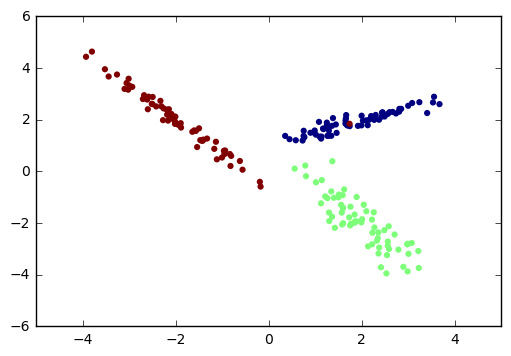

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, 
                           n_classes=3, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

In [24]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), 
                                   test_size=0.33, random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        24
        1.0       1.00      1.00      1.00        22
        2.0       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        66



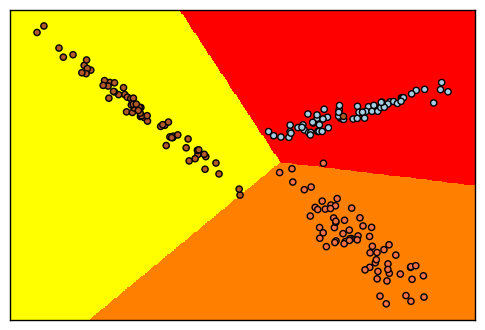

In [27]:
import numpy as np

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [28]:
print(X_test[0])
print(y_test[0])
print(y_clf[0])

[ 0.73255032  1.19639333]
0.0
0


In [29]:
clf.predict_proba(X_test[0])

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.72797056,  0.06275109,  0.20927835]])

In [30]:
clf.decision_function(X_test[0])

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.37213503, -2.92299969, -1.58433774]])

# An example

In [31]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=10, n_redundant=0, 
                           random_state=101)

## Using statsmodels

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [33]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [34]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 26 Dec 2016   Pseudo R-squ.:                  0.3671
Time:                        10:45:22   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000         0.353     0.506
x1             0.0671      0.015      4.410      0.000         0.037     0.097
x2            -0.7828      0.019    -41.947      0.000        -0.819    -0.746
x3             0.1221      0.016      7.815      0.000         0.091     0.153
x4             0.2841      0.016     18.150      0.000         0.253     0.315
x5             0.1469      0.014     10.283      0.000         0.119     0.175
x6            -0.3414      0.019    -17.636      0.000        -0.379    -0.303
x7             0.0503      0.014      3.481      0.000         0.022     0.079
x8            -0.1393      0.014     -9.642      0.000        -0.168    -0.111
x9             0.1127      0.014      7.931      0.000         0.085     0.141
x10           -0.4792      0.018    -27.340      0.000        -0.514    -0.445
==============================================================================
"""

In [35]:
import pandas as pd

# As an alternative, this example is using the statsmodels.formula.api module
# Equivalent to the R syntax for linear models, it requires to specify the form
# of the logistic regression using 'response ~ predictor1 (+ predictor2 + ...)'

Xd = pd.DataFrame(X)
Xd.columns = ['VAR'+str(i+1) for i in range(10)]
Xd['response'] = y

logistic_regression = smf.logit(
    formula = 'response ~ VAR1+ VAR2 + VAR3 + VAR4 + \
               VAR5 + VAR6 + VAR7 + VAR8 + VAR9 + VAR10',
               data=Xd)

fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 26 Dec 2016   Pseudo R-squ.:                  0.3671
Time:                        10:45:22   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4299      0.039     11.023      0.000         0.353     0.506
VAR1           0.0671      0.015      4.410      0.000         0.037     0.097
VAR2          -0.7828      0.019    -41.947      0.000        -0.819    -0.746
VAR3           0.1221      0.016      7.815      0.000         0.091     0.153
VAR4           0.2841      0.016     18.150      0.000         0.253     0.315
VAR5           0.1469      0.014     10.283      0.000         0.119     0.175
VAR6          -0.3414      0.019    -17.636      0.000        -0.379    -0.303
VAR7           0.0503      0.014      3.481      0.000         0.022     0.079
VAR8          -0.1393      0.014     -9.642      0.000        -0.168    -0.111
VAR9           0.1127      0.014      7.931      0.000         0.085     0.141
VAR10         -0.4792      0.018    -27.340      0.000        -0.514    -0.445
==============================================================================
"""

## Gradient Descend

In [36]:
from sklearn.preprocessing import StandardScaler
import numpy as np
observations = len(X)
variables = ['VAR'+str(i+1) for i in range(10)]

In [37]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def sigmoid(X,w):
    return 1./(1.+np.exp(-np.dot(X,w)))

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def logit_loss(X,w,y):
    return sigmoid(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y,loss_type=squared_loss):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss_type(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01, loss_type=squared_loss):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y,loss_type))]

def optimize(X,y, alpha=0.01, eta = 10**-12, loss_type=squared_loss, iterations = 1000):
    standardization = StandardScaler()
    Xst = standardization.fit_transform(X)
    original_means, originanal_stds = standardization.mean_, standardization.std_
    Xst = np.column_stack((Xst,np.ones(observations)))
    w = random_w(Xst.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(Xst,w,y))
        new_w = update(Xst,w,y, alpha=alpha, loss_type=logit_loss)
        new_SSL = np.sum(squared_loss(Xst,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            break
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    unstandardized_betas = w[:-1] / originanal_stds
    unstandardized_bias  = w[-1]-np.sum((original_means / originanal_stds) * w[:-1])
    return np.insert(unstandardized_betas, 0, unstandardized_bias), path, k
                                  
alpha = 0.5
w, path, iterations = optimize(X, y, alpha, eta = 10**-5, loss_type=logit_loss, iterations = 100000)
print ("These are our final standardized coefficients: %s" % w)
print ("Reached after %i iterations" % (iterations+1))

/usr/local/lib/python3.4/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead
  warnings.warn(msg, category=DeprecationWarning)


These are our final standardized coefficients: [ 0.42991407  0.0670771  -0.78279578  0.12208733  0.28410285  0.14689341
 -0.34143436  0.05031078 -0.1393206   0.11267402 -0.47916908]
Reached after 885 iterations


## Scikit-Learn implementations

In [38]:
from sklearn.linear_model import LogisticRegression

# C: Inverse of regularization strength; must be a positive float.
# tol: Tolerance for stopping criteria.

clf = LogisticRegression(C=1E4, tol=1E-25, random_state=101)
clf.fit(X,y)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=101,
          solver='liblinear', tol=1e-25, verbose=0, warm_start=False)

In [39]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

[0.42991394845314013,
 0.067077096874709571,
 -0.7827957661488677,
 0.12208730826867403,
 0.28410283693190325,
 0.14689340914475538,
 -0.34143434245188609,
 0.050310756492560116,
 -0.13932059152314755,
 0.11267402173781314,
 -0.47916904027905599]

In [40]:
from sklearn.linear_model import SGDClassifier

# alpha: Constant that multiplies the regularization term.
# n_iter: The number of passes over the training data (aka epochs).


clf = SGDClassifier(loss='log', alpha=1E-4, n_iter=1E2, random_state=101)
clf.fit(X,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=100.0, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=101, shuffle=True,
       verbose=0, warm_start=False)

In [41]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

[0.42571117875899578,
 0.092754663986175323,
 -0.78381378869544116,
 0.093708745822509432,
 0.16756466505271234,
 0.10596527209458735,
 -0.41091578158018655,
 0.062219832489940376,
 -0.19435965629236057,
 0.23531208244782129,
 -0.48793778455042092]